### Housing Price with Classification Models   

In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from urllib.request import urlopen 
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,precision_score, recall_score, auc,roc_curve

# A.1 Read and Evaluate Data

In this section, the train data file is read and evaluated

In [2]:
data = pd.read_csv('KaggleHousingDataFile.csv')

In [3]:
print('Check number of rows and columns of data file:')
data.shape

Check number of rows and columns of data file:


(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('Display column name of data file:')
data.columns

Display column name of data file:


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Total number of columns is printed 

In [6]:
print('Number of features/columns:',len(data.columns))

Number of features/columns: 81


Next we will check useful standard descriptive statistics for each feature including mean, standard deviation, minimum value, maximum value, and range intervals.

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can see through count values that some columns, including LotFrontage, MasVnrArea, and GarageYrBlt have missing values. 
Also, we can through the maximum row that our data varies in distribution. This will be important when considering classification models.


Standardization is an important requirement for many classification models that should be considered when implementing pre-processing. Some models can perform poorly if pre-processing isn't considered, so the describe() function can be a good indicator for standardization. Fortunately Random Forest does not require any pre-processing.

Next, we plot the histogram of SalePrice to check its distribution. 

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

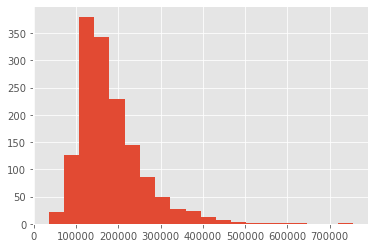

In [8]:
plt.hist(data['SalePrice'],bins=20)

Histogram of sale price is not a Gaussian model. The model looks like a Poissson distibution. 
Therefore in the next line, the percentile at 20%, 40%, 60%, and 80% is chosen. 

In [9]:
data.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
20%,292.800000,20.000000,53.000000,7078.400000,5.000000,5.000000,1947.800000,1961.800000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,0.000000,1066.600000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000
40%,584.600000,30.000000,63.000000,8793.400000,6.000000,5.000000,1965.000000,1980.000000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,0.000000,1339.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1973.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
60%,876.400000,60.000000,74.000000,10198.200000,6.000000,5.000000,1984.000000,1998.000000,16.000000,525.600000,0.000000,604.400000,1088.000000,1182.000000,455.400000,0.000000,1578.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1993.000000,2.000000,516.000000,100.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2008.000000,179280.000000
80%,1168.200000,80.000000,85.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,206.000000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2004.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
max,1460.000000,190.000000,313.000000,21

Next, we show SalePrice distibution. 

In [10]:
data.describe(percentiles=[0.2, 0.4, 0.6, 0.8])['SalePrice']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
20%      124000.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
80%      230000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# A.2 Missing Values

In this part, I evaluate the columns with missing values. I set Pandas to show all rows, otherwise the display will truncate rows. 

In [11]:
pd.set_option('display.max_rows', None)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Second, we show data type for each column to evaluate if it is numerical or categorical.

In [12]:
print("Here's the data types of various variables:\n", data.dtypes)

Here's the data types of various variables:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
Total

# A.3 Feature Selection

The goal of this project is to classify house SalePrice based on selected input features. Therefore, I select 8 features out of 80 features, i.e. 8 clumns out of 80 columns. 

In [13]:
Sammplefeatures = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
            'OverallQual','MiscVal','SalePrice']

In [14]:
pd.set_option('display.max_rows', 10)

Next, I prepared input features by removing SalePrice. 

In [15]:
X= data[Sammplefeatures].loc[:, data[Sammplefeatures].columns != 'SalePrice']
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,OverallQual,MiscVal
0,8450,2003,856,854,2,3,8,7,0
1,9600,1976,1262,0,2,3,6,6,0
2,11250,2001,920,866,2,3,6,7,0
3,9550,1915,961,756,1,3,7,7,0
4,14260,2000,1145,1053,2,4,9,8,0


Then, I prepared the output feature, which is SalePrice column. Since the min value of SalePrice is 34900, therefore I divided SalePrice by 100. 

In [16]:
Y= data['SalePrice']/100
Y.head()

0    2085.0
1    1815.0
2    2235.0
3    1400.0
4    2500.0
Name: SalePrice, dtype: float64

# A.4 Feature Normlization

###### By looking at standard distribution of feature, which was shown by describe fucntion earlier, the input feature are in different ranges. I use StandardScaler function to standarize input features. 

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X)

norm_X = pd.DataFrame(scaler.transform(X))
norm_X.head()

,0,1,2,3,4,5,6,7,8
0,-0.207142,1.050994,-0.793434,1.161852,0.789741,0.163779,0.912210,0.651479,-0.087688
1,-0.091886,0.156734,0.257140,-0.795163,0.789741,0.163779,-0.318683,-0.071836,-0.087688
2,0.073480,0.984752,-0.627826,1.189351,0.789741,0.163779,-0.318683,0.651479,-0.087688
3,-0.096897,-1.863632,-0.521734,0.937276,-1.026041,0.163779,0.296763,0.651479,-0.087688
4,0.375148,0.951632,-0.045611,1.617877,0.789741,1.390023,1.527656,1.374795,-0.087688


(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 349.  ,  709.05, 1069.1 , 1429.15, 1789.2 , 2149.25, 2509.3 ,
        2869.35, 3229.4 , 3589.45, 3949.5 , 4309.55, 4669.6 , 5029.65,
        5389.7 , 5749.75, 6109.8 , 6469.85, 6829.9 , 7189.95, 7550.  ]),
 <a list of 20 Patch objects>)

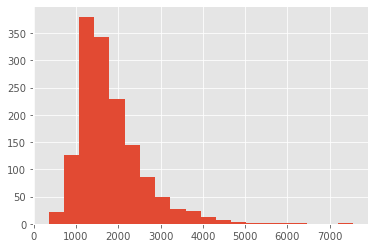

In [18]:
plt.hist(Y, bins=20)

# A.5 Bin Sale Price for Classification

In order to evalue housing sale price by a classification model, I binned SalePrice into five bins. Because my plan is to classify SalePrice in five categories. 
The boundries of each bin are selected using percentile values. 

Note: I evaluated the count values in each bin to make sure data are balanced between categories. 

In [19]:
bins_cut=np.arange(6)
bins_cut[0] = min(Y)-1
bins_cut[1] = Y.quantile(0.2)
bins_cut[2] = Y.quantile(0.4)
bins_cut[3] = Y.quantile(0.6)
bins_cut[4] = Y.quantile(0.8)
bins_cut[5] = max(Y)+1     

print('Bins cut are selected as:', bins_cut)

Bins cut are selected as: [ 348 1240 1470 1792 2300 7551]


In [20]:
label_y = ["low", "med low", "med", "med high", "high"]
df_y_bin = (pd.cut(Y,bins = bins_cut, labels = label_y))
df_y_bin.value_counts()

med high    295
low         295
med low     294
high        289
med         287
Name: SalePrice, dtype: int64

As shown above, the value count for each bin shows that the data is distributed almost equally in five categories, which means there is not imbalance data. 

In [22]:
df_y_bin.head(10)

0    med high
1    med high
2    med high
3     med low
4        high
5     med low
6        high
7    med high
8     med low
9         low
Name: SalePrice, dtype: category
Categories (5, object): ['low' < 'med low' < 'med' < 'med high' < 'high']

# B.1 Creating Training and Test Data Sets

###### The first set of train and test data set is chosen from raw data set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.array(df_y_bin), test_size=0.2, random_state=4)

###### The second set of train and test data set is chosen from normalized input feature set

In [24]:
from sklearn.model_selection import train_test_split
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(norm_X, np.array(df_y_bin), test_size=0.2, random_state=4)

# C.1 Fitting Random Forest

### C.1.a Fitting Random Forest on Raw, i.e. unnormalized, train test data set

Here, we evaluate Random Forest Model on raw, i.e. unnormalized data sets

In [25]:
rf = RandomForestClassifier(random_state=456)
rf.fit(X_train, y_train)   # with default settings

RandomForestClassifier(random_state=456)

In [26]:
# Save Randon Forest Model for unnormalized data set 
import pickle
pickle.dump(rf,open("ProjectV2",'wb'))

# Load the model
rf_loaded = pickle.load(open("ProjectV2", 'rb'))
y_pred1 = rf_loaded.predict(X_test)

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)) 
print(rf.score(X_test, y_test))

[[54  0  1 10  0]
 [ 0 43  0  1 11]
 [ 0  3 27 16 16]
 [ 4  0  9 29  1]
 [ 1 17 18  2 29]]
0.6232876712328768
0.6232876712328768


### C.1.b Fitting Random Forest on normalized train test data set

Here, we evaluate Random Forest Model on normalized data sets

In [27]:
rf = RandomForestClassifier(random_state=456)
rf.fit(X_train_norm, y_train_norm)   # with default settings

RandomForestClassifier(random_state=456)

In [28]:
# Save Random Forest Model on normalized data set
import pickle
pickle.dump(rf,open("ProjectV2Norm",'wb'))

# Load the model
rf_loaded = pickle.load(open("ProjectV2Norm", 'rb'))
y_pred1 = rf_loaded.predict(X_test_norm)

y_pred = rf.predict(X_test_norm)

print(confusion_matrix(y_test_norm, y_pred))

print(accuracy_score(y_test_norm, y_pred)) 

print(rf.score(X_test_norm, y_test_norm))

[[54  0  1 10  0]
 [ 0 43  0  1 11]
 [ 0  3 27 16 16]
 [ 4  0  9 29  1]
 [ 1 17 18  2 29]]
0.6232876712328768
0.6232876712328768


###### As shown from C.1.a and C.1.b, the SalePrice prediction using raw and normalized data set are similar. 

# C.2 Variable Importance

In this part, I evaluate 5 most important features from selected features

In [29]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)


print('Top 5 important features are:')
feature_importances.head()



Top 5 important features are:


,importance
1stFlrSF,0.214007
YearBuilt,0.187119
LotArea,0.172531
OverallQual,0.161039
2ndFlrSF,0.093790


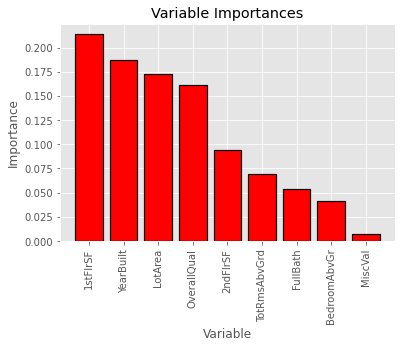

In [30]:
x_values = list(range(len(feature_importances['importance'])))
plt.bar(x_values, feature_importances['importance'], orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_importances.index, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# C.3 Use Grid Search

###### In this section, I use grid search method to find optimum parameters for estimator, max-features, and criteria.  

In [31]:
np.random.seed(123)
start = time.time()
n_estimators = [1, 2, 6, 10, 16, 24, 32, 64, 100, 250, 400]

max_features = ('auto', 'sqrt', 'log2', None)
criteria = ('gini', 'entropy')

parameters = { 'n_estimators': n_estimators,
              'max_features': max_features,
              'criterion': criteria,
             }

rf = RandomForestClassifier(random_state=456)

rf_model = GridSearchCV(rf, parameters,cv = 10,n_jobs = 3)

rf_model.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      rf_model.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

# Set the rf to the best combination of parameters
rf = rf_model.best_estimator_

# Fit the best algorithm to the data. 
rf.fit(X_train, y_train)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 24}
Time taken in grid search:  149.97


RandomForestClassifier(criterion='entropy', n_estimators=24, random_state=456)

In [32]:
y_pred = rf.predict(X_test)
print('Accuracy Score of Random Forest Classifier using Grid Search:', accuracy_score(y_test,y_pred))

Accuracy Score of Random Forest Classifier using Grid Search: 0.6267123287671232


# D.1 Creating Different Models

###### In this section, we evaluate and compare several classification models, including:  Random Forest Classifier, Logistic Regression, Gaussian Naive Bayesian, K Neighbors Classifier, Support Vector Classification, Decision Tree Classifier.  

In [33]:
# Evaluate each model 
Models = [
    #Ensemble Methods
    sklearn.ensemble.RandomForestClassifier(),
   
    #GLM
    sklearn.linear_model.LogisticRegressionCV(),

    #Navies Bayes
    sklearn.naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    sklearn.neighbors.KNeighborsClassifier(),
    
    #SVM
    sklearn.svm.SVC(probability=True),
    
    #Trees    
    sklearn.tree.DecisionTreeClassifier()
    ]


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)

row_index = 0
for model in Models:
    
    
    predicted = model.fit(X_train, y_train).predict(X_test)
    Model_name = model.__class__.__name__
    Model_compare.loc[row_index,'Model Name'] = Model_name
    Model_compare.loc[row_index, 'Model Train Accuracy'] = round(model.score(X_train, y_train), 4)
    Model_compare.loc[row_index, 'Model Test Accuracy'] = round(model.score(X_test, y_test), 4)
    Model_compare.loc[row_index, 'Model Precission'] = precision_score(y_test, predicted,average='macro')
    Model_compare.loc[row_index, 'Model Recall'] = recall_score(y_test, predicted,average='macro')
    
    row_index+=1
    
Model_compare.sort_values(by = ['Model Test Accuracy'], ascending = False, inplace = True)    
Model_compare


,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precission,Model Recall
0,RandomForestClassifier,0.9991,0.6370,0.633274,0.645486
5,DecisionTreeClassifier,0.9991,0.5788,0.583032,0.590471
2,GaussianNB,0.5856,0.5753,0.611322,0.581145
3,KNeighborsClassifier,0.6361,0.4692,0.463277,0.472363
1,LogisticRegressionCV,0.4889,0.4007,0.398956,0.421823
4,SVC,0.3579,0.3322,0.313382,0.350762


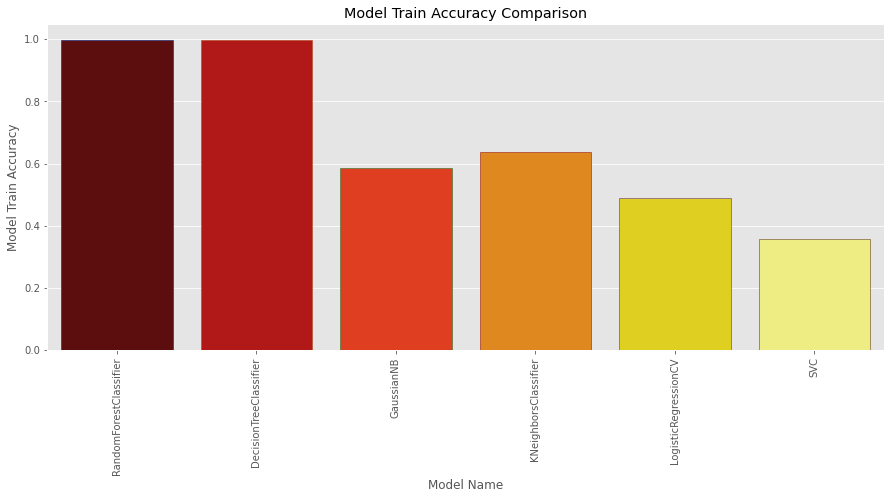

In [36]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model Name", y="Model Train Accuracy",data=Model_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train Accuracy Comparison')
plt.show()

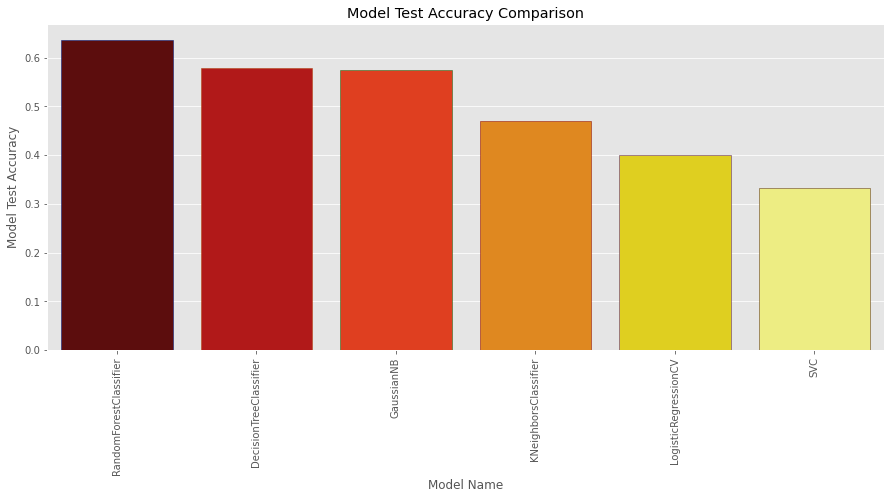

In [37]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model Name", y="Model Test Accuracy",data=Model_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparison')
plt.show()

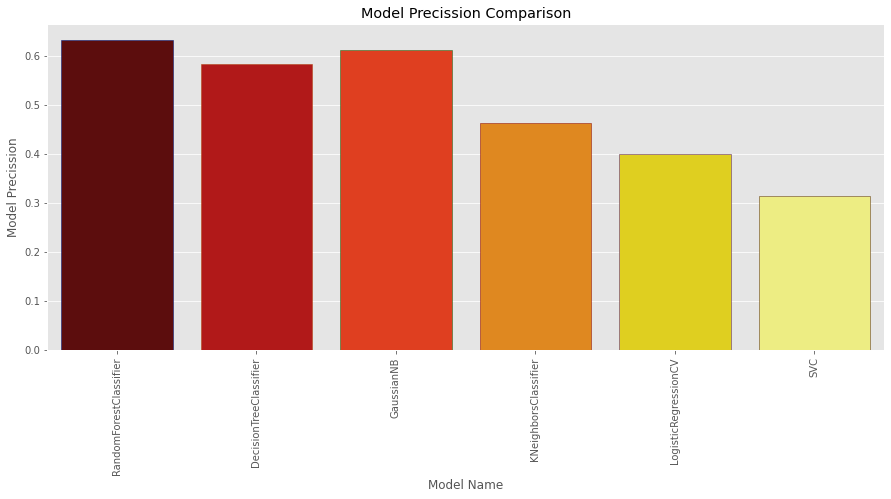

In [38]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model Name", y="Model Precission",data=Model_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precission Comparison')
plt.show()

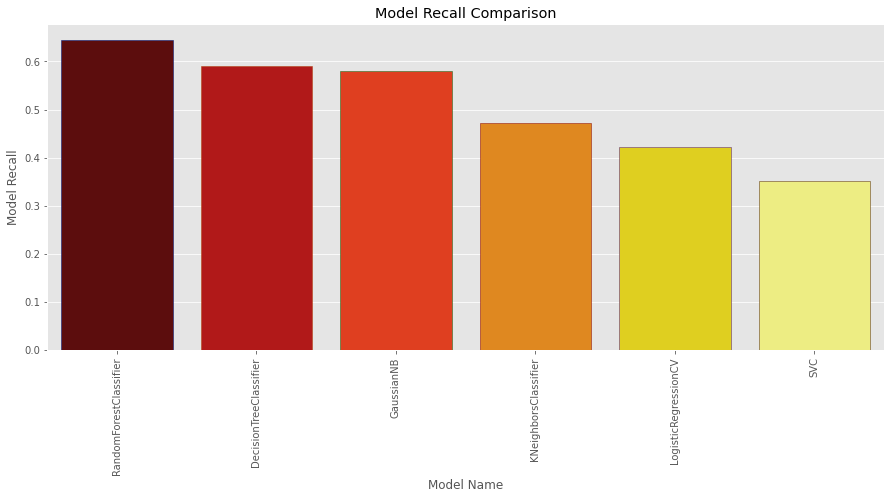

In [39]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model Name", y="Model Recall",data=Model_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Recall Comparison')
plt.show()

# E.1 Conclusion

In this project, housing SalePrice from kaggle housing price competision was categorized into five groups. The problem used nine features to predic SalePrice. 
Six classification models, including: 1) Random Forest Classifier, 2) Decision Tree Classifier, 3) SVC, 4) K Neighbor Classifier, 5) Gaussian NAive Baysian, and 6) Logistic RegressionCV were used in this project. 
Among these model, Random Forest Classifier resulted in best classifying prediction. 
As expected, SVC and Logistic Regression resulted the worst classifying prediction. Becasuse these two models are generally used for regression problems.   